## Load and analyze DMPS @ Zeppelin

In [1]:
import dominics_functions as fu
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import scipy as sc

# These lines auto-updates the functions in other packages which is useful if these functions are changed. 
%load_ext autoreload
%autoreload 2

In [2]:
path = 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\'

In [3]:
import glob 
glob.glob(path+'\\*')

['C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2010_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2011_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2012_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2013_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2014_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010to2020\\DMPS_and_CPC_2015_QA_QC@STP_HARMONIZED_PT20210207.dat',
 'C:\\Users\\Lovisa\\Documents\\Courses II\\E_science_tools HT22\\Project\\DATA_ZEP_2010

In [4]:
DFs_2010_2020 = fu.load_and_append_2010_2020(path, 
                             name_in_file='DMPS')

['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC', 'CPC3010', 'Ntot', 'unknown4', 'unknown5', 'unknown6', 'unknown7', 'unknown8', '5.0118723e-09', '5.6234133e-09', '6.3095734e-09', '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08', '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08', '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08', '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08', '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08', '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07', '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07', '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07', '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07', '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07', '7.0794578e-07', 'flag']
C:\Users\Lovisa\Documents\Courses II\E_science_tools HT22\Project\DATA_ZEP_2010to2020\DMPS_and_CPC_2010_QA_QC@STP

In [5]:
fu.get_columns_2010_2020?

In [6]:
df_2010_2020 = fu.concat_df_2010_2020(DFs_2010_2020)
dict_years_to_df = {"2010_2020":df_2010_2020}

In [7]:
uniqueFlags = df_2010_2020['flag'].unique()
flags = df_2010_2020['flag'].values
nanFlags = np.isnan(flags)

In [8]:
nanFlags[nanFlags == True]

array([], dtype=bool)

In [9]:
nanFlags[nanFlags]

array([], dtype=bool)

In [10]:
bin_col_names_2010_2020 = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
   '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
   '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
   '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
   '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
   '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
   '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
   '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
   '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
   '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
   '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
   '7.0794578e-07']

def get_bins(bin_col_names_2010_2020):
    bin_col_names_2010_2020_floats = [float(i)*10**9 for i in bin_col_names_2010_2020]
    bin_cols = np.around(bin_col_names_2010_2020_floats,decimals=3)
    bin_cols = np.asarray(bin_cols)
    bin_cols = [str(x) for x in bin_cols] # Loop over all list things and change them to str 
    return bin_cols

In [11]:
def renameDpColumns(df_2010_2020, bin_col_names_2010_2020):
    bin_cols = get_bins(bin_col_names_2010_2020)

    # Rename all columns 
    
    dict_cols_to_goodnames = dict(zip(bin_col_names_2010_2020, bin_cols))
   
    df_2010_2020 = df_2010_2020.rename(dict_cols_to_goodnames, axis=1)
    
    return df_2010_2020

In [12]:
df_2010_2020 = renameDpColumns(df_2010_2020, bin_col_names_2010_2020)
df_2010_2020.head(10)
print(df_2010_2020['flag'].unique())

[0.]


In [13]:
# Make a list of all the "real" diameters

GMDs = ['5.0118723e-09', '5.6234133e-09', '6.3095734e-09',
       '7.0794578e-09', '7.9432823e-09', '8.9125094e-09', '1.0000000e-08',
       '1.1220185e-08', '1.2589254e-08', '1.4125375e-08', '1.5848932e-08',
       '1.7782794e-08', '1.9952623e-08', '2.2387211e-08', '2.5118864e-08',
       '2.8183829e-08', '3.1622777e-08', '3.5481339e-08', '3.9810717e-08',
       '4.4668359e-08', '5.0118723e-08', '5.6234133e-08', '6.3095734e-08',
       '7.0794578e-08', '7.9432823e-08', '8.9125094e-08', '1.0000000e-07',
       '1.1220185e-07', '1.2589254e-07', '1.4125375e-07', '1.5848932e-07',
       '1.7782794e-07', '1.9952623e-07', '2.2387211e-07', '2.5118864e-07',
       '2.8183829e-07', '3.1622777e-07', '3.5481339e-07', '3.9810717e-07',
       '4.4668359e-07', '5.0118723e-07', '5.6234133e-07', '6.3095734e-07',
       '7.0794578e-07']
diameterList = [float(i) for i in GMDs]
diameters = np.asarray(diameterList)
print(diameters.shape)

(44,)


In [14]:
dict_years_to_df = fu.resample_dfs(dict_years_to_df, "2010_2020")

In [15]:
df_daily_2010_2020_mean = df_2010_2020.resample('D').mean()
df_daily_2010_2020_mean = df_daily_2010_2020_mean.dropna(how='all')
print(df_daily_2010_2020_mean['flag'].unique())

[0.]


In [16]:
df_aug04 = df_2010_2020[('2010-08-04' < df_2010_2020.index) & (df_2010_2020.index < '2010-08-05')]

In [17]:
df_aug04

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,


In [18]:
df_daily_2010_2020_mean[df_daily_2010_2020_mean['flag'] != 0]

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,


In [19]:
df_daily_2010_2020_median = df_2010_2020.resample('D').median()
print(len(df_daily_2010_2020_median))
df_daily_2010_2020_median = df_daily_2010_2020_median.dropna(how='all')
print(len(df_daily_2010_2020_median))
print(df_daily_2010_2020_median['flag'].unique())

3804
2765
[0.]


In [20]:
df_2010_2020

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03 00:30:00,0.000000,192.743870,243.841220,2.808560e-29,2.806373e-29,2.803910e-29,2.801134e-29,2.798005e-29,2.794476e-29,2.790497e-29,...,41.174992,30.989534,24.949570,12.333647,2.245721e+00,2.551309e-02,2.092485e-29,NaN,NaN,0.0
2010-08-03 01:00:00,0.000000,193.466340,215.133030,2.808381e-29,2.806194e-29,2.803731e-29,2.800955e-29,2.797826e-29,2.794297e-29,2.790318e-29,...,30.370227,16.315628,14.749940,7.853108,1.110854e+00,1.222512e-02,7.289623e-02,NaN,NaN,0.0
2010-08-03 01:30:00,0.000000,171.506230,202.354390,2.807616e-29,2.805429e-29,2.802965e-29,2.800189e-29,2.797060e-29,2.793531e-29,2.789551e-29,...,20.511996,16.397279,8.066267,4.359914,3.408711e+00,3.556573e+00,2.125525e+00,NaN,NaN,0.0
2010-08-03 02:00:00,0.000000,150.032880,171.320550,2.806932e-29,2.804744e-29,2.802280e-29,2.799504e-29,2.796374e-29,2.792845e-29,2.788615e-29,...,13.715205,9.214429,4.748312,4.956812,5.186443e+00,1.304189e+00,8.860881e-01,NaN,NaN,0.0
2010-08-03 02:30:00,0.000000,133.506560,161.293020,2.806105e-29,2.803917e-29,2.801453e-29,2.798676e-29,2.795546e-29,2.792016e-29,2.788035e-29,...,13.290051,8.655610,0.852759,1.619113,3.022508e+00,6.016886e-02,2.090299e-29,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 21:30:00,56.350639,0.000247,48.698550,NaN,4.886631e-29,4.882139e-29,3.247188e-02,1.181012e+01,7.456215e-01,1.873911e+00,...,31.708429,25.569377,23.542183,23.039887,2.099111e+01,1.465256e+01,4.512089e+00,3.879896e-01,1.682041e-29,0.0
2020-12-31 22:00:00,50.637021,0.000247,47.612653,NaN,4.896749e-29,4.892582e-29,4.887882e-29,4.882049e-29,4.998722e+00,4.922543e+00,...,56.135564,44.864584,32.885559,27.823568,6.129010e+00,1.783454e-29,1.755401e-29,1.718470e-29,1.431358e+00,0.0
2020-12-31 22:30:00,46.395453,0.000000,46.080686,NaN,2.416071e+00,4.887524e-29,1.625665e-02,5.912592e+00,5.495055e+00,2.628574e+00,...,33.595440,34.983295,35.877135,36.893967,9.487407e+00,1.781413e-29,1.753614e-29,1.721915e-29,1.692892e-29,0.0


In [21]:
#df_daily_2010_2020_median.iloc[0:20, 3:]

In [22]:
#df_daily_2010_2020_mean.iloc[0:20, 3:-1]

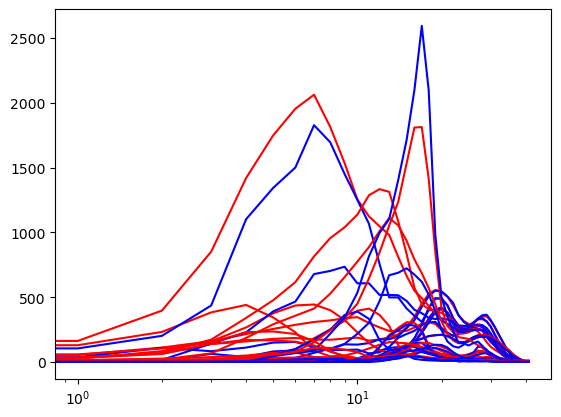

In [23]:
# Plot daily mean distribution
ii = np.arange(0, len(df_daily_2010_2020_mean), 1)

jj = np.arange(7,25,1)

fig, ax = plt.subplots()

for i in jj:
    df_tmp_mean = df_daily_2010_2020_mean.iloc[i, 3:-1].to_frame() # Omit last column with -1 as that is flags
    
    ax.plot(df_tmp_mean.index, df_tmp_mean.values,'r')
    ax.set_xscale('log')
    
    df_tmp_median = df_daily_2010_2020_median.iloc[i,3:-1].to_frame()
    ax.plot(df_tmp_median.index, df_tmp_median.values,'b')
    ax.set_xscale('log')
    
    

## Calculate the bin widths and $N_{tot}$ 

In [24]:
# Check to see that all intervals are equally spaced on a log scale
# np.diff(np.log10(diameters))

In [25]:
# Calculate the bin widths from geometric mean diameters and the total particle number concentration for each year

def calcNtot(diameters, df_daily_2010_2020_median):
    # Create array to store upper bin boudaries
    upperBoundaries = np.empty(0)
    diameter_list = list(diameters)

    # Create array to store the number concentration in each bin
    dNs = np.empty(0)
    upperLimits = []

    for Dp in range(len(diameter_list)-1):

        # Calulate the upper bin from the geo mean of the midpoint diamters as they are equally spaced on a log scale
        upperLimits.append(np.sqrt( diameter_list[Dp] * diameter_list[Dp+1] ) )

    upperLimits = np.array(upperLimits)

    # Calulate the endpoints, ie the first lower limit and the last upper limit
    firstLimit = diameter_list[0]**2 / upperLimits[0] # This is actually the first lower limit, but its needed for the first binwidth
    lastLimit = diameter_list[-1]**2 / upperLimits[-1]

    upperBoundaries = np.insert(upperLimits, 0, firstLimit) 
    upperBoundaries = np.append(upperBoundaries, lastLimit)

    # Calculate dlogDp from the boundaries
    dlogDp = np.log10(upperBoundaries[1:]) - np.log10(upperBoundaries[:-1])

    # Calculate the particle concentration in each bin (dN) by multiplying dNdlogD with dlogD

    lenDiam = len(diameters)
    idx = len(GMDs)-lenDiam+3

    dNdlogDp = df_daily_2010_2020_median.iloc[:,idx:-1]
    dNs = dNdlogDp*(dlogDp)
    ntotCalc = dNs.sum(axis=1)    

    df_daily_2010_2020_median_ntotCalc = df_daily_2010_2020_median.copy(deep = True)
    df_daily_2010_2020_median_ntotCalc['NtotCalc'] = ntotCalc
    return df_daily_2010_2020_median_ntotCalc

In [26]:
df_daily_2010_2020_median_ntotCalc = calcNtot(diameters, df_daily_2010_2020_median)

In [27]:
df_daily_2010_2020_median_ntotCalc.head(20)

,UFCPC,CPC3010,Ntot,5.012,5.623,6.31,7.079,7.943,8.913,10.0,...,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946,flag,NtotCalc
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,0.0,182.125050,208.743710,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,...,1.595947e+01,1.140810e+01,6.404960e+00,3.215610e+00,6.580380e-02,3.644812e-02,NaN,NaN,0.0,195.422265
2010-08-08,0.0,208.549030,216.002220,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,...,2.583533e-01,3.454788e-01,7.831442e-01,2.956088e-01,1.836670e-02,2.100116e-29,NaN,NaN,0.0,197.317230
2010-08-09,0.0,154.734860,161.003870,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,...,2.046894e+00,1.640962e+00,1.104209e+00,6.720334e-01,3.448541e-01,3.823051e-01,NaN,NaN,0.0,129.073125
2010-08-10,0.0,134.719790,131.968835,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,...,1.163181e+00,2.004981e+00,1.831223e+00,1.312853e+00,6.538213e-01,8.970167e-01,NaN,NaN,0.0,109.282715
2010-08-11,0.0,238.900390,235.042670,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,...,2.129925e+00,2.208846e+00,1.974385e+00,1.572773e+00,1.200883e+00,9.980769e-01,NaN,NaN,0.0,209.785219
2010-08-12,0.0,217.511540,210.367135,2.809073e-29,2.811712e-29,2.809459e-29,2.810912e-29,2.988597e-01,2.759165e+01,3.907844e+01,...,3.029406e+00,2.734418e+00,2.293894e+00,1.758534e+00,1.196882e+00,1.270764e+00,NaN,NaN,0.0,178.575169
2010-08-13,0.0,345.619480,365.804310,2.804068e-29,2.803278e-29,2.806286e-29,9.656931e-01,2.395757e-01,2.280036e+01,3.302152e+01,...,2.013338e+00,2.162721e+00,1.652657e+00,1.387767e+00,7.904804e-01,1.037931e+00,NaN,NaN,0.0,347.025333
2010-08-17,0.0,73.230619,90.965196,2.798339e-29,2.796429e-29,2.793905e-29,2.791786e-29,2.792821e-29,2.788836e-29,9.372879e-01,...,2.347158e-29,2.291268e-29,2.239401e-29,2.190885e-29,2.146085e-29,2.103895e-29,NaN,NaN,0.0,44.688033
2010-08-18,0.0,253.924260,274.264120,2.818039e-29,3.566908e+01,1.086134e+02,8.241685e+01,1.104258e+02,1.488785e+02,1.534663e+02,...,2.435447e+01,1.159827e+01,6.361371e+00,3.276498e+00,1.181661e+00,8.864701e-01,NaN,NaN,0.0,288.351084


In [28]:
cols = df_daily_2010_2020_median.columns[3:-1]

In [29]:
cols

Index(['5.012', '5.623', '6.31', '7.079', '7.943', '8.913', '10.0', '11.22',
       '12.589', '14.125', '15.849', '17.783', '19.953', '22.387', '25.119',
       '28.184', '31.623', '35.481', '39.811', '44.668', '50.119', '56.234',
       '63.096', '70.795', '79.433', '89.125', '100.0', '112.202', '125.893',
       '141.254', '158.489', '177.828', '199.526', '223.872', '251.189',
       '281.838', '316.228', '354.813', '398.107', '446.684', '501.187',
       '562.341', '630.957', '707.946'],
      dtype='object')

In [30]:
diameter_list = list(diameters) 
df_daily_2010_2020_median[cols]

,5.012,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,...,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-03,2.807274e-29,2.805087e-29,2.802623e-29,2.799847e-29,2.796717e-29,2.793188e-29,2.789083e-29,2.784506e-29,2.779898e-29,2.528172,...,36.805352,25.441111,15.959473,11.408104,6.404960,3.215610,6.580380e-02,3.644812e-02,NaN,NaN
2010-08-08,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,2.781377e-29,1.980118e+01,95.843733,...,1.347548,0.582094,0.258353,0.345479,0.783144,0.295609,1.836670e-02,2.100116e-29,NaN,NaN
2010-08-09,2.806636e-29,2.804662e-29,2.802281e-29,2.801081e-29,8.042767e-02,1.139879e+01,1.247090e+01,2.386696e+01,5.317039e+01,44.253335,...,6.824198,4.120078,2.046894,1.640962,1.104209,0.672033,3.448541e-01,3.823051e-01,NaN,NaN
2010-08-10,2.810195e-29,2.808443e-29,2.512165e+00,1.344979e+00,9.600177e-01,3.076694e+01,4.277998e+01,6.963213e+01,1.180271e+02,115.314160,...,2.201041,1.821533,1.163181,2.004981,1.831223,1.312853,6.538213e-01,8.970167e-01,NaN,NaN
2010-08-11,2.816689e-29,2.814186e-29,2.812867e-29,2.813508e-29,1.201330e+00,4.388591e+01,7.954211e+01,1.319526e+02,2.299151e+02,359.763670,...,3.949737,3.182375,2.129925,2.208846,1.974385,1.572773,1.200883e+00,9.980769e-01,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,4.856011e-29,4.852284e-29,4.849348e-29,4.847406e-29,4.842079e-29,1.124949e-01,4.242500e+00,4.548924e+00,6.194749e+00,7.793845,...,13.867514,12.961275,10.035624,7.545087,4.860186,6.319750,5.246771e+00,4.236436e+00,5.858947e-01,1.829243e+00
2020-12-28,NaN,4.883492e-29,4.898032e-29,4.886053e-29,4.880367e-29,4.892914e-29,2.828007e+00,4.719816e+00,8.951490e+00,12.309525,...,48.724140,30.998753,26.608241,20.886540,11.484529,7.620646,6.249617e+00,5.127825e+00,2.445025e+00,1.705581e+00
2020-12-29,NaN,4.924687e-29,4.921681e-29,4.920744e-29,4.915452e-29,3.734622e-01,2.861616e+00,4.430043e+00,8.259293e+00,11.333296,...,18.791206,13.295481,8.799040,5.236407,0.004128,0.425705,1.802560e-29,1.766702e-29,1.734943e-29,1.705079e-29


In [31]:
# Check that boundries are correct

# ys = [0,10]

# fig, ax = plt.subplots()
# for i in range(len(diameters)):
#     ls = [diameters[i], diameters[i]]
#     ax.plot(ls,ys,'r:')
#     ax.set_xscale('log')
    
# for i in range(len(upperBoundaries)):
#     ls2 = [upperBoundaries[i],upperBoundaries[i]]
#     ax.plot(ls2,ys,'b')
    


In [32]:
# ls = [diameters[i], diameters[i]]
# print(ls)

Text(0, 0.5, '$N_{tot}$ from DMPS')

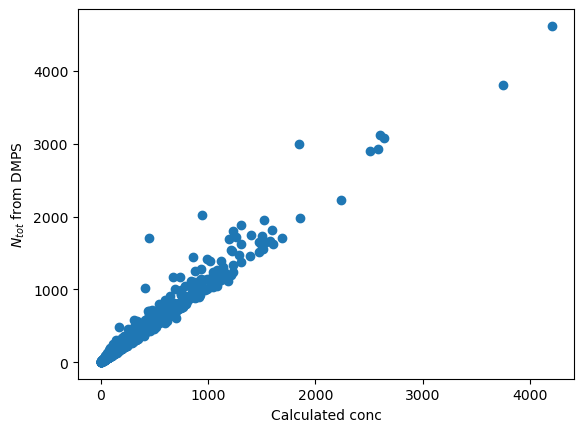

In [33]:
# # Scatter plot the 

plt.plot(df_daily_2010_2020_median_ntotCalc['NtotCalc'].values,df_daily_2010_2020_median_ntotCalc['Ntot'].values ,'o')
plt.xlabel('Calculated conc')
plt.ylabel('$N_{tot}$ from DMPS')


### N_tot from CPC vs calclated N_tot

R-squared: 0.967927


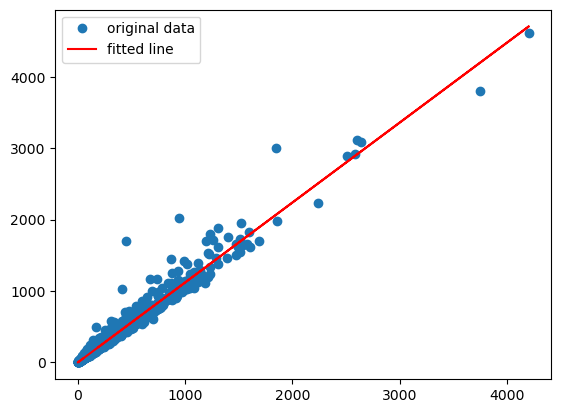

-3.3923359941788362
1.121695266295067


In [34]:
varx = df_daily_2010_2020_median_ntotCalc['NtotCalc'].values
vary = df_daily_2010_2020_median_ntotCalc['Ntot'].values

mask = ~np.isnan(varx) & ~np.isnan(vary)
res = sc.stats.linregress(varx[mask], vary[mask])

print(f"R-squared: {res.rvalue**2:.6f}")

plt.plot(varx,
         vary,
         'o', label='original data')
plt.plot(varx,
         res.intercept + res.slope*varx,
         'r-', label='fitted line')
plt.legend()
plt.show()    
print(res.intercept)
print(res.slope)

### Compare $N_{D_P <x}/N_{tot}$

In [35]:
# Compare the area up to x nm with total area 
# Vary the threshold diameter x

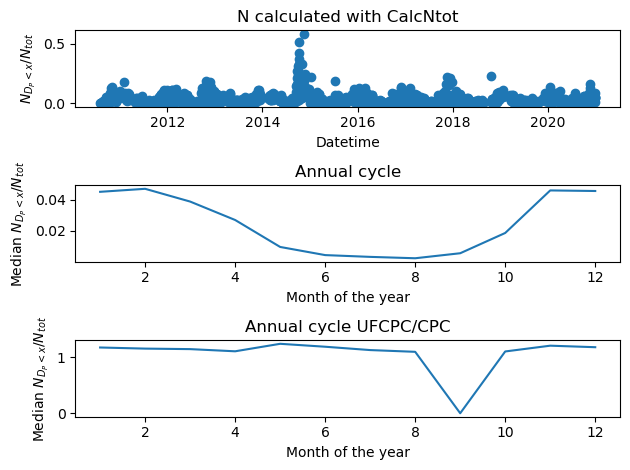

In [36]:
threshold = 10

bin_cols = get_bins(bin_col_names_2010_2020)
#print(bin_cols)
bin_cols = [float(x) for x in bin_cols]
bin_cols = [x for x in bin_cols if x < threshold]
#print(bin_cols)

df_tmp = calcNtot(diameters[:len(bin_cols)+1], df_daily_2010_2020_median)

# Plot Nx/Ntot
NxNtot = df_tmp['NtotCalc'].values/df_tmp['Ntot'].values

fig, axs = plt.subplots(3)

axs[0].plot(df_tmp.index,NxNtot,'o')
axs[0].set_xlabel('Datetime')
axs[0].set_ylabel('$N_{D_P < x}/N_{tot}$')
axs[0].set_title('N calculated with CalcNtot')

df_tmp['NxNtot'] = df_tmp['NtotCalc']/df_tmp['Ntot']
df_annual_cycle = df_tmp['NxNtot'].groupby(df_tmp.index.month).median()

axs[1].plot(df_annual_cycle.index, df_annual_cycle.values)
axs[1].set_xlabel('Month of the year')
axs[1].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[1].set_title('Annual cycle')

df_tmp['ratio_CPCs'] = df_tmp['UFCPC']/df_tmp['CPC3010']
df_annual_cycle_CPC = df_tmp['ratio_CPCs'].groupby(df_tmp.index.month).median()

axs[2].plot(df_annual_cycle_CPC.index, df_annual_cycle_CPC.values)
axs[2].set_xlabel('Month of the year')
axs[2].set_ylabel('Median $N_{D_P < x}/N_{tot}$')
axs[2].set_title('Annual cycle UFCPC/CPC')


plt.tight_layout()

In [37]:
df_tmp['flag'].unique()

array([0.])

In [38]:
df_daily_2010_2020_median['flag']

DateTime
2010-08-03    0.0
2010-08-08    0.0
2010-08-09    0.0
2010-08-10    0.0
2010-08-11    0.0
             ... 
2020-12-27    0.0
2020-12-28    0.0
2020-12-29    0.0
2020-12-30    0.0
2020-12-31    0.0
Name: flag, Length: 2765, dtype: float64

In [39]:
df_tmp['UFCPC'].min() 

0.0

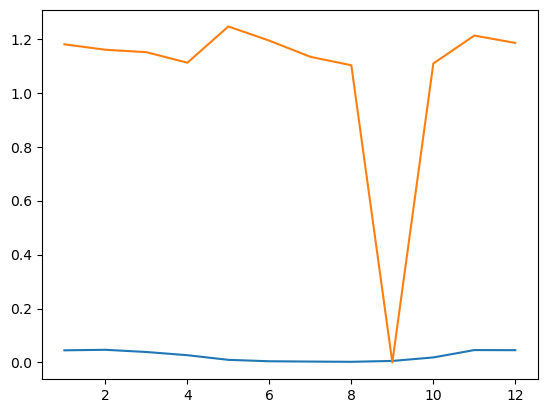

In [40]:


df_annual_cycle = df_tmp['NxNtot'].groupby(df_tmp.index.month).median()


plt.plot(df_annual_cycle.index, df_annual_cycle.values)
plt.plot(df_annual_cycle_CPC.index, df_annual_cycle_CPC.values)

In [41]:
df_annual_cycle 

DateTime
1     0.045076
2     0.047008
3     0.038825
4     0.027010
5     0.009729
6     0.004505
7     0.003367
8     0.002487
9     0.005699
10    0.018696
11    0.045969
12    0.045601
Name: NxNtot, dtype: float64

In [42]:
df_tmp.index.month

Int64Index([ 8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='DateTime', length=2765)

## Attempt to integrate with trapezoidal rule to find the ratio $N_{<30}/N_{tot}$

In [43]:
# diameter_list = list(diameters)
# df_daily_2010_2020_median[cols]

# df_daily_2010_2020_median['diameter_list'].values

In [44]:
# This array will contain the trpezioidal integration of total distribution 
ntot_trap_mean = 9999*np.ones((1,len(df_daily_2010_2020_mean))) 


In [45]:
# Integrating over all daily median distributions = N_tot daily

# bin_cols = get_bins(bin_col_names_2010_2020)

# def add_trapz_integration(diameters, df_daily_2010_2020_median):
    
#     list_of_areas = []
#     diameter_list = list(diameters)
    
#     for i in np.arange(0,len(df_daily_2010_2020_median)):
#         df_tmp_median = df_daily_2010_2020_median.iloc[i, 3:-1]
        
#         ys = df_tmp_median.values[~np.isnan(df_tmp_median.values)]
#         xs = np.array(diameters[~np.isnan(df_tmp_median.values)])
                
#         trap_tmp = np.trapz(ys, , dx=1.0, axis=- 1)
        
#         # Becuse we integrate over the lognormal distribution, we have to denormalize by multiplying 
#         list_of_areas.append(trap_tmp)
    
#     # Make a copy of dataframe to wich the trapz area is added
#     df_with_added_area = df_daily_2010_2020_median.copy(deep = True)
#     df_with_added_area['area'] = list_of_areas
# return df_with_added_area

In [46]:
#df_trapz_area_median = add_trapz_integration(df_daily_2010_2020_median)

In [47]:
df_daily_2010_2020_median.iloc[1:2,3:-1]

,5.012,5.623,6.31,7.079,7.943,8.913,10.0,11.22,12.589,14.125,...,251.189,281.838,316.228,354.813,398.107,446.684,501.187,562.341,630.957,707.946
DateTime,,,,,,,,,,,,,,,,,,,,,
2010-08-08,2.803765e-29,2.801642e-29,2.799177e-29,2.796336e-29,2.793333e-29,2.789739e-29,2.785956e-29,2.781377e-29,19.801175,95.843733,...,1.347548,0.582094,0.258353,0.345479,0.783144,0.295609,0.018367,2.100116e-29,NaN,NaN


## Compare the trapz integration 
#### (should correspond to the $N_{tot}$ dataframe column)

In [48]:
# I want to make a scatter plot 


plt.plot(df_trapz_area_median['area'].values, df_trapz_area_median['Ntot'],'o')
plt.xlabel('Trapezoidal area')
plt.ylabel('$N_{tot}$')

NameError: name 'df_trapz_area_median' is not defined

In [ ]:
print(1000/0.0001)

## Other

In [ ]:
name_to_start_size_bin = {'2010_2020': 10.0}
name_to_end_size_bin = {'2010_2020':398.107}

xrs_2010_2020 = fu.df_to_xr(dict_years_to_df, '2010_2020', name_to_start_size_bin, name_to_end_size_bin)

In [ ]:
fig = fu.create_colourmesh(xrs_2010_2020)

In [ ]:
additional_2010_2020 = ['Year', 'Month', 'Day', 'Hour', 'Minute', 'UFCPC','CPC3010','Ntot','unknown4','unknown5', 'unknown6',
              'unknown7','unknown8']  
v = [additional_2010_2020[0], additional_2010_2020[8]]